In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
data_path = 'wdbc.data'
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(data_path, header=None, names=columns)
data.head()

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [138]:
data = data.drop(columns=["ID"])

In [139]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [140]:
print("Basic statistics of the dataset:")
print(data.describe())

Basic statistics of the dataset:
        Diagnosis   feature_1   feature_2   feature_3    feature_4  \
count  569.000000  569.000000  569.000000  569.000000   569.000000   
mean     0.372583   14.127292   19.289649   91.969033   654.889104   
std      0.483918    3.524049    4.301036   24.298981   351.914129   
min      0.000000    6.981000    9.710000   43.790000   143.500000   
25%      0.000000   11.700000   16.170000   75.170000   420.300000   
50%      0.000000   13.370000   18.840000   86.240000   551.100000   
75%      1.000000   15.780000   21.800000  104.100000   782.700000   
max      1.000000   28.110000   39.280000  188.500000  2501.000000   

        feature_5   feature_6   feature_7   feature_8   feature_9  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.00000

In [142]:
print("Count of each diagnosis class:")
print(data['Diagnosis'].value_counts())

Count of each diagnosis class:
0    357
1    212
Name: Diagnosis, dtype: int64


In [143]:
X = data.drop(columns=["Diagnosis"])
y = data["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [148]:
y_pred_log = log_model.predict(X_test_scaled)
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

Confusion Matrix (Logistic Regression):
[[70  1]
 [ 2 41]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [149]:
with open('logistic_model_v1.pkl', 'wb') as file:
    pickle.dump(log_model, file)

In [150]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [151]:
y_pred_dt = dt_model.predict(X_test_scaled)
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix (Decision Tree):
[[68  3]
 [ 4 39]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [152]:
with open('decision_tree_model_v2.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

In [153]:
coefficients = log_model.coef_[0]
feature_importances = pd.DataFrame(coefficients, index=X.columns, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

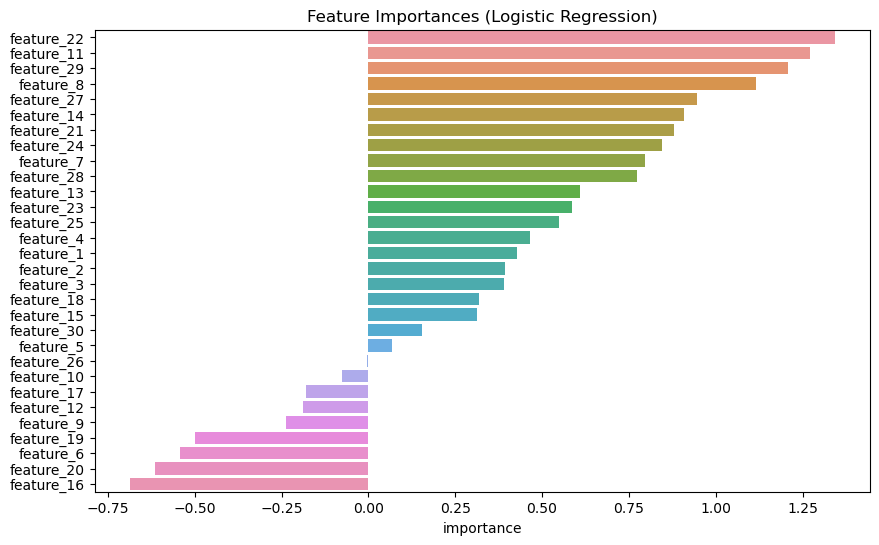

In [154]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title("Feature Importances (Logistic Regression)")
plt.show()